<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict

import prophet as pr

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'sales.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'mall_customers.csv',
 'online_retail_II.xlsx',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 '1_orders_dataset.csv',
 'ecommerce-data.csv',
 'bz_data_analyis.csv',
 'test.csv',
 'groceries.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [25]:
df = pd.read_csv('bz_data_analyis.csv')
df.order_date = pd.to_datetime(df.order_date, infer_datetime_format=True)
df['ds'] = df.order_date.to_numpy().astype('datetime64[D]')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,ds
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18


In [26]:
df.quantity_ordered.value_counts()

1          109128
1           59357
2            8663
2            4707
3            1867
3            1066
4             529
4             280
5             152
5              86
6              49
6              31
7              18
7               6
8               5
9               3
1+C1273         1
32              1
22              1
Name: quantity_ordered, dtype: int64

In [27]:
df.quantity_ordered = df.quantity_ordered.apply(lambda x : np.where(re.search('C', str(x)), '1', x))
df.quantity_ordered = df.quantity_ordered.astype(int)
df['y'] = df.quantity_ordered * df.price_each
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,ds,y
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,1700.00
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,1800.00
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,35.85
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,299.98
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,11.95


In [28]:
list_product = df['product'].value_counts().reset_index().rename(columns = {'index':'product', 'product':'cnt'})
list_product['cat'] = ['cable', 'cable', 'battery', 'battery', 'headphone', 'headphone', 'headphone', 'monitor',
                       'mobile', 'monitor', 'monitor', 'mobile', 'tv', 'laptop',
                       'laptop', 'monitor','mobile', 'whites', 'whites'
                       ]
list_product
product = dict(zip(list_product['product'], list_product['cat']))
product

{'USB-C Charging Cable': 'cable',
 'Lightning Charging Cable': 'cable',
 'AAA Batteries (4-pack)': 'battery',
 'AA Batteries (4-pack)': 'battery',
 'Wired Headphones': 'headphone',
 'Apple Airpods Headphones': 'headphone',
 'Bose SoundSport Headphones': 'headphone',
 '27in FHD Monitor': 'monitor',
 'iPhone': 'mobile',
 '27in 4K Gaming Monitor': 'monitor',
 '34in Ultrawide Monitor': 'monitor',
 'Google Phone': 'mobile',
 'Flatscreen TV': 'tv',
 'Macbook Pro Laptop': 'laptop',
 'ThinkPad Laptop': 'laptop',
 '20in Monitor': 'monitor',
 'Vareebadd Phone': 'mobile',
 'LG Washing Machine': 'whites',
 'LG Dryer': 'whites'}

In [29]:
df['cat'] = df['product'].apply(lambda x : product.get(x, x))
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,ds,y,cat
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,1700.00,laptop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,1800.00,whites
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,35.85,cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,299.98,monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,11.95,cable


In [30]:
cnt = df.groupby(['ds', 'cat'])['y'].sum().reset_index()
cnt.head()

,ds,cat,y
0,2019-01-01,battery,309.11
1,2019-01-01,cable,1141.75
2,2019-01-01,headphone,5021.54
3,2019-01-01,laptop,24299.91
4,2019-01-01,mobile,19200.00


In [33]:
def get_oracle(df) :

  list_work = list_product['cat']

  res = list()

  for worker in list_work : 

    temp = cnt[cnt['cat'] == worker].reindex(['ds', 'y'], axis = 1)
    m = pr.Prophet().fit(temp)
    future = m.make_future_dataframe(periods = 60)
    forecast = m.predict(future)
    temp = forecast[['ds', 'trend', 'yhat']]
    temp.insert(0, 'cat', worker)

    res.append(temp)

  res = pd.concat(res).reset_index().drop(['index'], axis = 1)

  return res

In [34]:
res = get_oracle(cnt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuwht1ke/f4z2ww_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuwht1ke/gw761jnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97429', 'data', 'file=/tmp/tmpsuwht1ke/f4z2ww_1.json', 'init=/tmp/tmpsuwht1ke/gw761jnz.json', 'output', 'file=/tmp/tmpsuwht1ke/prophet_modelvnfcaaaa/prophet_model-20221113233123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:31:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [35]:
res.head()

,cat,ds,trend,yhat
0,cable,2019-01-01,1090.429747,1121.027075
1,cable,2019-01-02,1098.186153,1028.960274
2,cable,2019-01-03,1105.942559,1112.641972
3,cable,2019-01-04,1113.698964,1115.902509
4,cable,2019-01-05,1121.455370,1131.623109


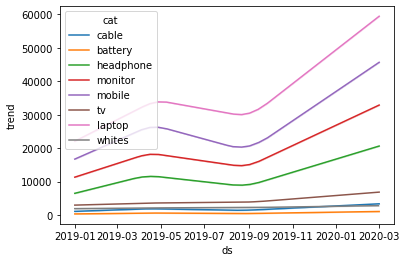

In [37]:
sns.lineplot(data = res, x = 'ds', y = 'trend', hue = 'cat' )

# Iterators

In [38]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [40]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}